In [1]:
# Library used for numerical calculations
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

In [2]:
# Library for drawing graphs
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# Library for estimating statistical models
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [4]:
# Determining the number of display digits
%precision 3
# Specification for displaying graph in Jupyter Notebook
%matplotlib inline

In [5]:
beer = pd.read_csv("5-1-1-beer.csv")
print(beer.head())

   beer  temperature
0  45.3         20.5
1  59.3         25.0
2  40.4         10.0
3  38.0         26.9
4  37.0         15.8


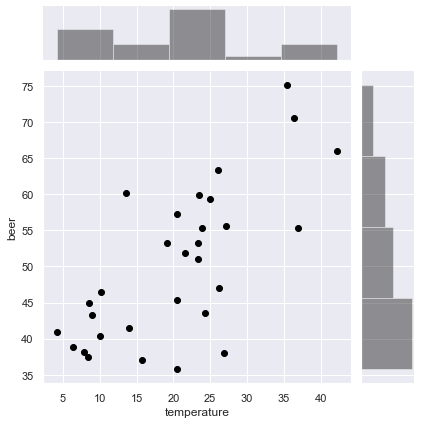

In [6]:
sns.jointplot(x = "temperature", y = "beer",
             data = beer, color = 'black')

When the population distribution is assumed to be normal distribution, the maximum likelihood method agrees with least squares method result. 

In [7]:
# smf.ols func., OLS: Ordinary Least Squares
lm_model = smf.ols(formula = "beer ~ temperature", 
                   data = beer).fit()

In [8]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Sun, 15 Mar 2020   Prob (F-statistic):           1.11e-05
Time:                        13:37:17   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
null_model = smf.ols("beer ~ 1", data = beer).fit() # Null model

In [10]:
null_model.aic # AIC of Null model

227.94194972563105

In [11]:
lm_model.aic # AIC of lm model

208.90902935575437

In [12]:
lm_model.llf # Log likelihood estimation

-102.45451467787719

In [13]:
lm_model.df_model # Number of explanatory variables

1.000

Number of parameters = number of explanatory variables + 1 (intercept $\beta_0$)

In [14]:
# AIC
-2 * (lm_model.llf - (lm_model.df_model + 1))

208.90902935575437

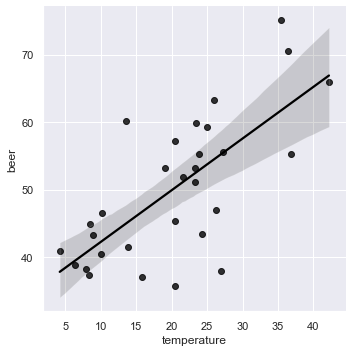

In [15]:
sns.lmplot(x = "temperature", y = "beer", data = beer, 
           scatter_kws = {"color": "black"}, 
           line_kws    = {"color": "black"})

Shaded area represents 95% confidence interval of regression line.

In [16]:
lm_model.predict()

array([50.301, 53.746, 42.264, 55.2  , 46.704, 37.825, 44.943, 54.511,
       52.445, 41.116, 54.664, 49.23 , 53.21 , 52.445, 41.04 , 52.598,
       45.25 , 61.783, 55.43 , 50.301, 42.418, 50.301, 51.143, 40.657,
       66.911, 52.904, 62.854, 41.423, 62.472, 39.509])

In [17]:
lm_model.predict(pd.DataFrame({"temperature": [0]}))

0    34.610215
dtype: float64

In [18]:
lm_model.params

Intercept      34.610215
temperature     0.765428
dtype: float64

In [19]:
lm_model.predict(pd.DataFrame({"temperature": [20]}))

0    49.918767
dtype: float64

In [20]:
beta0 = lm_model.params[0]
beta1 = lm_model.params[1]
temperature = 20

beta0 + beta1 * temperature

49.91876701095054

In [21]:
# Get residuals
resid = lm_model.resid
resid.head(3)

0   -5.001481
1    5.554095
2   -1.864491
dtype: float64

In [22]:
y_hat = beta0 + beta1 * beer.temperature
y_hat.head(3)

0    50.301481
1    53.745905
2    42.264491
Name: temperature, dtype: float64

In [23]:
(beer.beer - y_hat).head(3)

0   -5.001481
1    5.554095
2   -1.864491
dtype: float64

In [26]:
mu =np.mean(beer.beer)
y = beer.beer
yhat = lm_model.predict()

np.sum((yhat - mu)**2) / np.sum((y - mu)**2)

0.503959323061187

In [27]:
lm_model.rsquared

0.5039593230611856

In [29]:
np.sum((yhat - mu) ** 2) + sum(resid ** 2)

3277.114666666669

In [31]:
np.sum((y - mu) ** 2)

3277.1146666666655

In [32]:
1 - np.sum(resid ** 2) / np.sum((y - mu) ** 2)

0.5039593230611857

In [35]:
n = len(beer.beer)
s = 1
1 - ((np.sum(resid ** 2) / (n - s - 1)) / 
      (np.sum((y - mu) ** 2) / (n - 1)))

0.48624358459908523

In [36]:
lm_model.rsquared_adj

0.4862435845990851

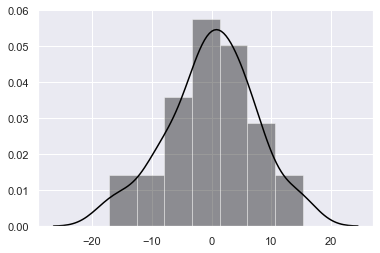

In [38]:
sns.distplot(resid, color = 'black')

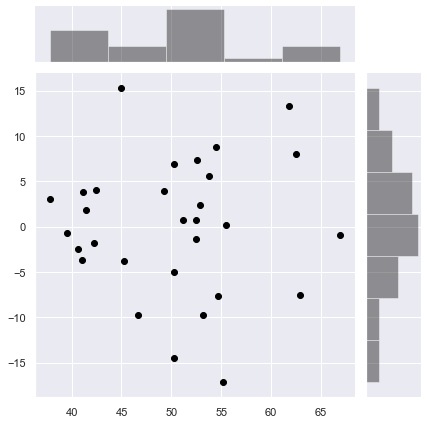

In [39]:
sns.jointplot(lm_model.fittedvalues, resid, 
              joint_kws = {"color": "black"}, 
              marginal_kws = {"color": "black"})

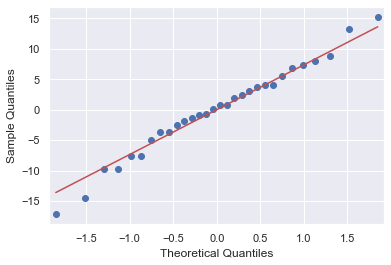

In [40]:
fig = sm.qqplot(resid, line = "s")

In [41]:
resid_sort = resid.sort_values()
resid_sort.head()

3    -17.200217
21   -14.501481
12    -9.710106
4     -9.703971
10    -7.664418
dtype: float64

In [42]:
1 / 31

0.032

In [44]:
nobs = len(resid_sort)
cdf = np.arange(1, nobs + 1) / (nobs + 1)
cdf

array([0.032, 0.065, 0.097, 0.129, 0.161, 0.194, 0.226, 0.258, 0.29 ,
       0.323, 0.355, 0.387, 0.419, 0.452, 0.484, 0.516, 0.548, 0.581,
       0.613, 0.645, 0.677, 0.71 , 0.742, 0.774, 0.806, 0.839, 0.871,
       0.903, 0.935, 0.968])

In [45]:
ppf = stats.norm.ppf(cdf)
ppf

array([-1.849, -1.518, -1.3  , -1.131, -0.989, -0.865, -0.753, -0.649,
       -0.552, -0.46 , -0.372, -0.287, -0.204, -0.122, -0.04 ,  0.04 ,
        0.122,  0.204,  0.287,  0.372,  0.46 ,  0.552,  0.649,  0.753,
        0.865,  0.989,  1.131,  1.3  ,  1.518,  1.849])